In [100]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

conn = sqlite3.connect('C:/Users/nural/OneDrive/Documents/Learn Data/Pacmann Project/Data Wrangling and SQL Project/olist.db')


In [101]:
df = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
df

,name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


In [102]:
# define function to create df 

def get_result(query):
    conn = sqlite3.connect('C:/Users/nural/OneDrive/Documents/Learn Data/Pacmann Project/Data Wrangling and SQL Project/olist.db')
    cursor = conn.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    conn.close()
    return data

def create_df(data, columns):
    return pd.DataFrame(data=data, columns=columns).drop(['index'], axis=1)

### Olist Order Dataset

In [103]:
# Create Dataframe Olist Order
olist_order_dataset = create_df(
    get_result("SELECT * FROM olist_order_dataset"), 
    ['index', 'order_id', 'customer_id', 
     'order_status', 'order_purchase_timestamp', 
     'order_approved_at', 'order_delivered_carrier_date', 
     'order_delivered_customer_date', 'order_estimated_delivery_date'])

olist_order_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [104]:
# Total data
# Total canceled and unavailable orders
a = len(olist_order_dataset)
b = len(olist_order_dataset[olist_order_dataset['order_status'] == 'canceled'])
c = len(olist_order_dataset[olist_order_dataset['order_status'] == 'unavailable'])
print(a)
print(b)
print(c)

99441
625
609


In [105]:
# Checking datatypes and unique value
olist_order_dataset.info()
olist_order_dataset.order_status.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [106]:
# Checking Null Value
olist_order_dataset.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [107]:
# Drop unnecessary columns
olist_order_dataset_1 = olist_order_dataset.drop(columns=['order_delivered_carrier_date', 'order_estimated_delivery_date'])

In [108]:
# Drop columns with canceled and unavailable status order

olist_order_dataset_1 = olist_order_dataset_1.drop(index=olist_order_dataset_1[olist_order_dataset_1['order_status'] == 'unavailable'].index)
olist_order_dataset_1 = olist_order_dataset_1.drop(index=olist_order_dataset_1[olist_order_dataset_1['order_status'] == 'canceled'].index)

In [109]:
# Changing data type into datetime

olist_order_dataset_1['order_purchase_timestamp'] = pd.to_datetime(olist_order_dataset['order_purchase_timestamp'])
olist_order_dataset_1['order_approved_at'] = pd.to_datetime(olist_order_dataset['order_approved_at'])
olist_order_dataset_1['order_delivered_customer_date'] = pd.to_datetime(olist_order_dataset['order_delivered_customer_date'])

In [110]:
a = len(olist_order_dataset_1[olist_order_dataset_1['order_status'] == 'delivered'])
print(f"total data delivered {a}")
olist_order_dataset_1.isnull().sum()

total data delivered 96478


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  19
order_delivered_customer_date    1737
dtype: int64

In [111]:
# checking duplicate data
olist_order_dataset_1[olist_order_dataset_1.duplicated(keep=False)].sum()

order_id        0.0
customer_id     0.0
order_status    0.0
dtype: float64

In [112]:
#clean data

olist_order_dataset_1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02


### Olist Order Customer Dataset

In [113]:
#Create Order Customer Dataframe
olist_order_customer_dataset = create_df(
    get_result("SELECT * FROM olist_order_customer_dataset"), 
    ['index', 'customers_id', 
     'customers_uniq_id', 'customer_zip_code_prefix', 
     'customer_city', 'customer_state'])

olist_order_customer_dataset

,customers_id,customers_uniq_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [114]:
# Drop unnecessary columns
olist_order_customer_dataset_1 = olist_order_customer_dataset.drop(columns=['customer_zip_code_prefix'])

In [115]:
# Check Datatypes
olist_order_customer_dataset_1.info()

# Check null
olist_order_customer_dataset_1.isnull().sum()

# Check Duplicate   
olist_order_customer_dataset_1[olist_order_customer_dataset_1.duplicated(keep=False)].sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customers_id       99441 non-null  object
 1   customers_uniq_id  99441 non-null  object
 2   customer_city      99441 non-null  object
 3   customer_state     99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


customers_id         0.0
customers_uniq_id    0.0
customer_city        0.0
customer_state       0.0
dtype: float64

### Olist Order Items Dataset

In [116]:
# Creaete Order Items Dataframe
olist_order_items_dataset = create_df(
    get_result("SELECT * FROM olist_order_items_dataset"),
    ['index', 'order_id', 'order_item_id', 
     'product_id','seller_id', 
     'shipping_limit_date','price', 'freight_value'])

olist_order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [117]:
# Check Datatypes
olist_order_items_dataset.info()

# Check Null
olist_order_items_dataset.isnull().sum()

#Check Duplicate
olist_order_items_dataset[olist_order_items_dataset.duplicated(keep=False)].sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

In [118]:
# Drop unnecessary column
olist_order_items_dataset_1 = olist_order_items_dataset.drop(columns=['seller_id', 'shipping_limit_date', 'freight_value'])

### Olist Order Payments Dataset

In [119]:
# Create Order Payments dataframe
olist_order_payments_dataset = create_df(
    get_result("SELECT * FROM olist_order_payments_dataset"), 
    ['index', 'order_id', 'payment_sequential', 
     'payment_type', 'payment_installments', 'payment_value'])

olist_order_payments_dataset

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [120]:
# Check datatypes
olist_order_payments_dataset.info()

# Check null
olist_order_payments_dataset.isnull().sum()

# Check duplicate
olist_order_payments_dataset[olist_order_payments_dataset.duplicated(keep=False)].sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

### Olist Products Dataset

In [121]:
#Create Olist Products dataframe
olist_products_dataset = create_df(
    get_result("SELECT * FROM olist_products_dataset"), 
    ['index', 'product_id', 'product_category_name', 
     'product_name_length', 'product_description_length', 
     'product_photos_qty', "product_weight_g",
     'product_length_cm', 'product_height_cm', 'product_width_cm'])

olist_products_dataset

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [122]:
# Drop unnecessary columns
olist_products_dataset_1 = olist_products_dataset.drop(columns=['product_name_length', 'product_description_length'])

In [123]:
#Check datatypes
olist_products_dataset_1.info()

# Check null
olist_products_dataset_1.isnull().sum()

# Check duplicate 
olist_products_dataset_1[olist_products_dataset_1.duplicated(keep=False)].sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32341 non-null  object 
 2   product_photos_qty     32341 non-null  float64
 3   product_weight_g       32949 non-null  float64
 4   product_length_cm      32949 non-null  float64
 5   product_height_cm      32949 non-null  float64
 6   product_width_cm       32949 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.8+ MB


product_id               0.0
product_category_name    0.0
product_photos_qty       0.0
product_weight_g         0.0
product_length_cm        0.0
product_height_cm        0.0
product_width_cm         0.0
dtype: float64

### Olist Order Reviews Dataset

In [124]:
# Create Order Revies dataframe
olist_order_reviews_dataset = create_df(
    get_result("SELECT * FROM olist_order_reviews_dataset"),
    ['index', 'review_id', 'order_id', 
     'review_score','review_comment_title', 
     'review_comment_message','review_creation_date', 'review_answer_timestamp'])

olist_order_reviews_dataset

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,None,None,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,None,None,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,None,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,None,None,2018-07-01 00:00:00,2018-07-02 12:59:13


In [125]:
# Drop unnecessary columns
olist_order_reviews_dataset_1 = olist_order_reviews_dataset.drop(columns=['review_comment_title', 'review_creation_date', 'review_answer_timestamp'])

In [126]:
# Check datatypes
olist_order_reviews_dataset_1.info()

# Check null
olist_order_reviews_dataset_1.isnull().sum()

# Check duplicate
olist_order_reviews_dataset_1[olist_order_reviews_dataset_1.duplicated(keep=False)].sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_id               99224 non-null  object
 1   order_id                99224 non-null  object
 2   review_score            99224 non-null  int64 
 3   review_comment_message  40977 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


review_id                 0.0
order_id                  0.0
review_score              0.0
review_comment_message    0.0
dtype: float64

### Product Category Name Translation

In [127]:
# Create Product Category Name translation dataframe
product_category_name_translation = create_df(
    get_result("SELECT * FROM product_category_name_translation"), 
    ['index', 
     'product_category_name', 
    'product_category_name_english'])

product_category_name_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


### Merging Necessary Table

In [128]:
olist_products_dataset_2 = pd.merge(olist_products_dataset_1, product_category_name_translation, how='inner', on='product_category_name')

In [129]:
# memindahkan kolom 2 ke belakang
olist_products_dataset_2 = olist_products_dataset_2.reindex(columns=['product_id','product_category_name', 'product_category_name_english',
                                                                    'product_photos_qty', 'product_weight_g', 'product_length_cm',
                                                                    'product_height_cm', 'product_width_cm'])

# menampilkan dataframe setelah kolom dipindahkan
olist_products_dataset_2.head()

,product_id,product_category_name,product_category_name_english,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,1.0,225.0,16.0,10.0,14.0
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,perfumery,2.0,400.0,27.0,5.0,20.0
2,0d009643171aee696f4733340bc2fdd0,perfumaria,perfumery,1.0,422.0,21.0,16.0,18.0
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,perfumery,2.0,267.0,17.0,13.0,17.0
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,perfumery,3.0,377.0,18.0,13.0,15.0


In [130]:
olist_order_items_dataset_2 = pd.merge(olist_order_items_dataset_1, olist_products_dataset_2, how='inner', on='product_id')

In [131]:
olist_order_items_dataset_2 = olist_order_items_dataset_2.drop(columns=['product_category_name', 'product_photos_qty',
                                                                       'product_weight_g', 'product_length_cm', 
                                                                        'product_height_cm', 'product_width_cm'])

In [132]:
olist_order_items_dataset_2 = olist_order_items_dataset_2.reindex(columns=['order_id', 'order_item_id', 'product_category_name_english',
                                                                          'product_id', 'price'])

In [133]:
olist_order_items_dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111023 entries, 0 to 111022
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       111023 non-null  object 
 1   order_item_id                  111023 non-null  int64  
 2   product_category_name_english  111023 non-null  object 
 3   product_id                     111023 non-null  object 
 4   price                          111023 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.1+ MB


In [134]:
olist_order_items_dataset_2.head()

,order_id,order_item_id,product_category_name_english,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,cool_stuff,4244733e06e7ecb4970a6e2683c13e61,58.9
1,130898c0987d1801452a8ed92a670612,1,cool_stuff,4244733e06e7ecb4970a6e2683c13e61,55.9
2,532ed5e14e24ae1f0d735b91524b98b9,1,cool_stuff,4244733e06e7ecb4970a6e2683c13e61,64.9
3,6f8c31653edb8c83e1a739408b5ff750,1,cool_stuff,4244733e06e7ecb4970a6e2683c13e61,58.9
4,7d19f4ef4d04461989632411b7e588b9,1,cool_stuff,4244733e06e7ecb4970a6e2683c13e61,58.9


In [135]:
olist_order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [136]:
olist_order_customer_dataset_1.rename(columns={'customers_id':'customer_id'}, inplace=True)

olist_order_customer_dataset_1.head()

,customer_id,customers_uniq_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP


In [137]:
order_customer_payments = pd.merge(olist_order_dataset_1, olist_order_payments_dataset, how='inner', on='order_id')

In [138]:
order_customer_payments = pd.merge(order_customer_payments, olist_order_customer_dataset_1, how='inner', on='customer_id')

In [139]:
order_customer_payments = order_customer_payments.drop(columns=['order_approved_at', 'order_delivered_customer_date', 
                                                                'customers_uniq_id', 'customer_state'])

In [140]:
order_customer_payments = order_customer_payments.reindex(columns=['order_id','customer_id','customer_city',
                                                                 'payment_sequential','payment_type',
                                                                 'payment_installments','payment_value'])

In [141]:
order_customer_payments.head()

,order_id,customer_id,customer_city,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,sao paulo,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,sao paulo,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,sao paulo,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,barreiras,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,vianopolis,1,credit_card,3,179.12


In [142]:
order_customer_payments.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,102573,98206,fa65dad1b0e818e3ccc5cb0e39231352,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,102573,98206,9af2372a1e49340278e7c1ef8d749f34,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_city,102573,4109,sao paulo,15953,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_sequential,102573.0,NaN,NaN,NaN,1.091808,0.704679,1.0,1.0,1.0,1.0,29.0
payment_type,102573,4,credit_card,75905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_installments,102573.0,NaN,NaN,NaN,2.854416,2.686231,0.0,1.0,1.0,4.0,24.0
payment_value,102573.0,NaN,NaN,NaN,153.443275,214.763286,0.0,56.8,100.0,171.61,13664.08


In [143]:
pivot_table = order_customer_payments.pivot_table(values='payment_value', index='customer_city', columns='payment_type', aggfunc='sum')

In [144]:
pivot_table

payment_type,boleto,credit_card,debit_card,voucher
customer_city,,,,
abadia dos dourados,58.28,355.22,NaN,NaN
abadiania,NaN,1025.52,NaN,NaN
abaete,492.51,1454.30,NaN,NaN
abaetetuba,NaN,4637.27,NaN,35.00
abaiara,NaN,332.15,NaN,NaN
...,...,...,...,...
xinguara,245.24,1363.27,NaN,NaN
xique-xique,172.78,57.78,NaN,NaN
zacarias,NaN,229.85,NaN,NaN


In [145]:
olist_completed_1 = pd.merge(order_customer_payments, olist_order_items_dataset_2, how='inner', on='order_id')

In [146]:
olist_completed_1 = pd.merge(olist_completed_1, olist_order_dataset_1, how='inner', on='order_id')

In [147]:
olist_completed_1 = olist_completed_1.drop(columns=['customer_id_y', 'order_approved_at', 'order_delivered_customer_date'])

In [148]:
olist_completed_1 = olist_completed_1.reindex(columns=['order_id', 'customer_id_x', 'customer_city', 'order_status',
                                                  'order_purchase_timestamp', 'product_id', 'product_category_name_english',
                                                   'order_item_id' ,'price',
                                                  'payment_sequential', 'payment_type', 'payment_installments',
                                                  'payment_value'])

In [149]:
olist_completed_1.rename(columns={'customer_id_x':'customer_id'}, inplace=True)

In [150]:
olist_completed_1.rename(columns={'product_category_name_english':'product_category'}, inplace=True)

In [151]:
olist_completed_1

,order_id,customer_id,customer_city,order_status,order_purchase_timestamp,product_id,product_category,order_item_id,price,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,sao paulo,delivered,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,housewares,1,29.99,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,sao paulo,delivered,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,housewares,1,29.99,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,sao paulo,delivered,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,housewares,1,29.99,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,barreiras,delivered,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,perfumery,1,118.70,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,vianopolis,delivered,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,auto,1,159.90,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115317,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,praia grande,delivered,2018-02-06 12:58:58,f1d4ce8c6dd66c47bbaa8c6781c2a923,baby,1,174.90,1,credit_card,3,195.00
115318,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,nova vicosa,delivered,2017-08-27 14:46:43,b80910977a37536adeddd63663f916ad,home_appliances_2,1,205.99,1,credit_card,5,271.01
115319,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,japuiba,delivered,2018-01-08 21:28:27,d1c427060a0f73f6b889a5c7c61f2ac4,computers_accessories,1,179.99,1,credit_card,4,441.16
115320,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,japuiba,delivered,2018-01-08 21:28:27,d1c427060a0f73f6b889a5c7c61f2ac4,computers_accessories,2,179.99,1,credit_card,4,441.16


In [152]:
olist_completed_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115322 entries, 0 to 115321
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  115322 non-null  object        
 1   customer_id               115322 non-null  object        
 2   customer_city             115322 non-null  object        
 3   order_status              115322 non-null  object        
 4   order_purchase_timestamp  115322 non-null  datetime64[ns]
 5   product_id                115322 non-null  object        
 6   product_category          115322 non-null  object        
 7   order_item_id             115322 non-null  int64         
 8   price                     115322 non-null  float64       
 9   payment_sequential        115322 non-null  int64         
 10  payment_type              115322 non-null  object        
 11  payment_installments      115322 non-null  int64         
 12  pa

# 1. Kategori Produk yang Paling Banyak Terjual

In [153]:
# Produk paling populer
populer = olist_completed_1.groupby('product_category')['order_id'].count().reset_index()
populer.columns = ['product_category', 'jumlah_terjual']
populer = populer.sort_values(by='jumlah_terjual', ascending=False)
populer.head()

,product_category,jumlah_terjual
7,bed_bath_table,11805
43,health_beauty,9932
65,sports_leisure,8893
39,furniture_decor,8707
15,computers_accessories,8036


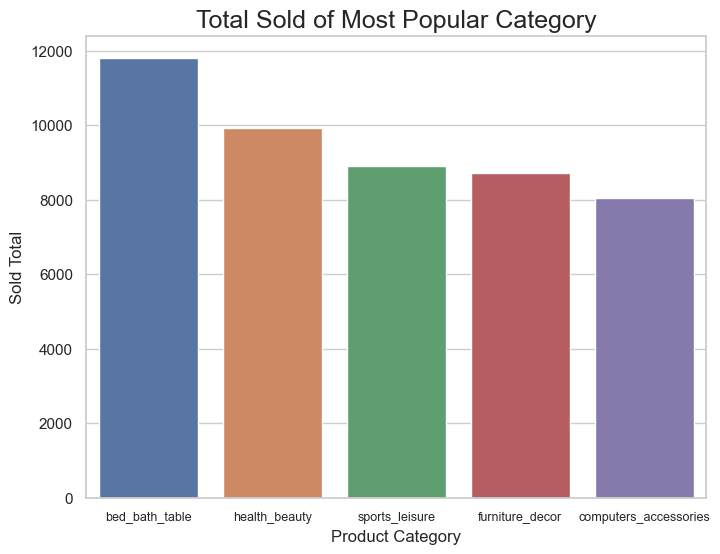

In [186]:
# Custom figures
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting
sns.barplot(data=populer.iloc[0:5], x= 'product_category', y='jumlah_terjual')

# show title
plt.title("Total Sold of Most Popular Category", fontsize=18)

# scale the xticks
plt.xticks(fontsize=9)

# Tampilkan label untuk x-axis
plt.xlabel('Product Category', fontsize=12)

# Tampilkan label untuk y-axis
plt.ylabel('Sold Total')

# Tunjukkan plot yang telah digambar
plt.show()

# 2. Kategori Produk yang Paling Sedikit Terjual

In [155]:
not_populer_1 = populer.tail()
not_populer_1

,product_category,jumlah_terjual
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8
61,security_and_services,2


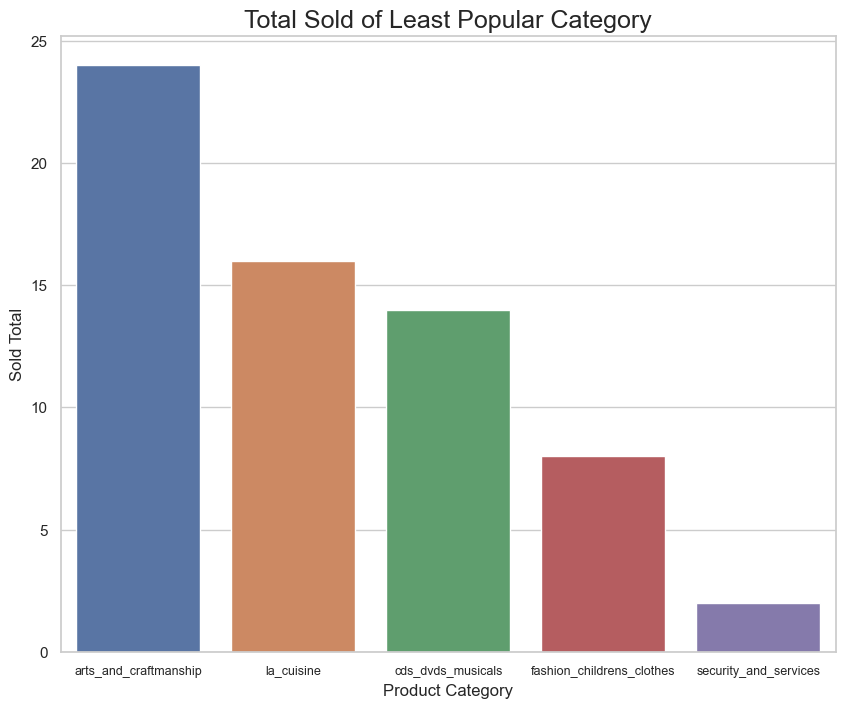

In [156]:
# Custom figures
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting
sns.barplot(data=not_populer_1, x= 'product_category', y='jumlah_terjual')

# show title
plt.title("Total Sold of Least Popular Category", fontsize=18)

# scale the xticks
plt.xticks(fontsize=9)

# Tampilkan label untuk x-axis
plt.xlabel('Product Category', fontsize=12)

# Tampilkan label untuk y-axis
plt.ylabel('Sold Total')

# Tunjukkan plot yang telah digambar
plt.show()

# 3. Kategori Produk yang Memiliki Penjualan Terbesar

In [157]:
# Produk paling laku
laku = olist_completed_1.groupby('product_category')['price'].sum().reset_index()
laku.columns = ['product_category', 'total_penjualan']
laku = laku.sort_values(by='total_penjualan', ascending=False)
laku.head()


,product_category,total_penjualan
43,health_beauty,1294194.30
70,watches_gifts,1246322.83
7,bed_bath_table,1091526.40
65,sports_leisure,1015652.39
15,computers_accessories,934645.27


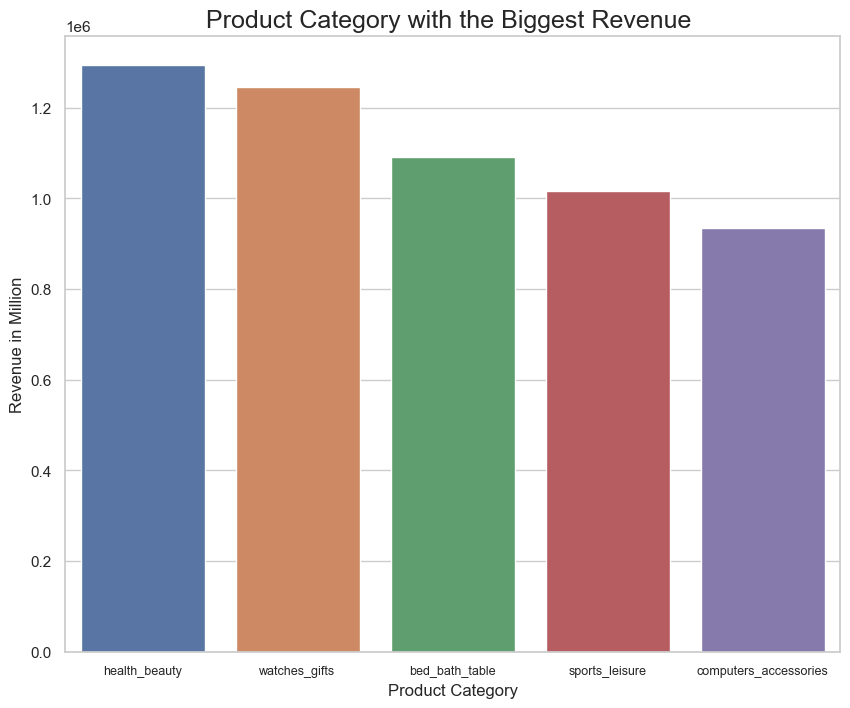

In [158]:
# Custom figures
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting
sns.barplot(data=laku.iloc[0:5], x= 'product_category', y='total_penjualan')

# show title
plt.title("Product Category with the Biggest Revenue ", fontsize=18)

# scale the xticks
plt.xticks(fontsize=9)

# Tampilkan label untuk x-axis
plt.xlabel('Product Category', fontsize=12)

# Tampilkan label untuk y-axis
plt.ylabel('Revenue in Million')

# Tunjukkan plot yang telah digambar
plt.show()

# 4. Kategori Produk yang Memiliki Penjualan Terkecil

In [159]:
# Produk penjualan paling kecil
not_laku = laku.tail()
not_laku

,product_category,total_penjualan
35,flowers,1110.04
46,home_comfort_2,773.17
11,cds_dvds_musicals,730.00
29,fashion_childrens_clothes,569.85
61,security_and_services,283.29


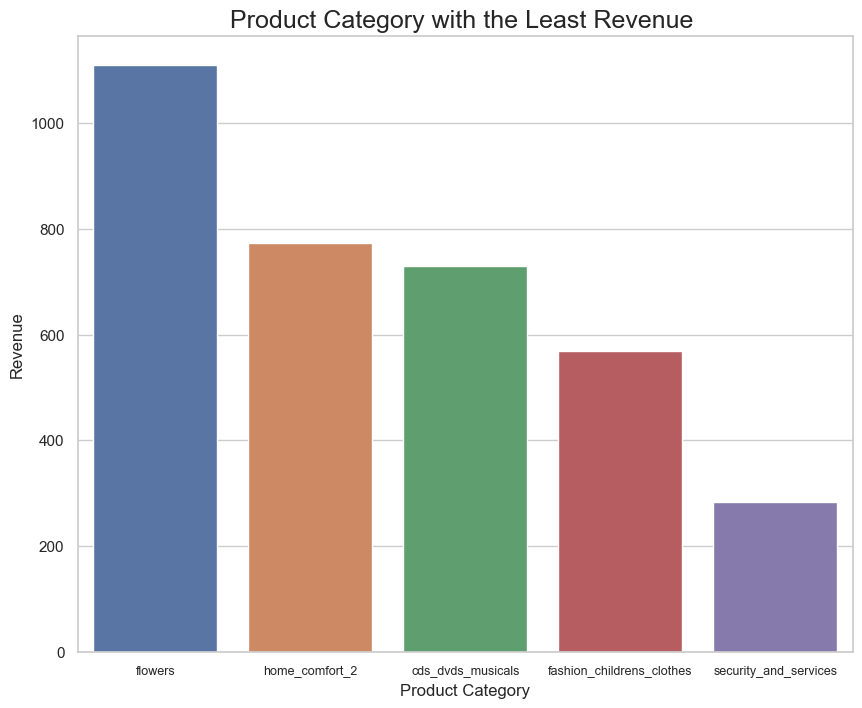

In [160]:
# Custom figures
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting
sns.barplot(data=not_laku, x= 'product_category', y='total_penjualan')

# show title
plt.title("Product Category with the Least Revenue ", fontsize=18)

# scale the xticks
plt.xticks(fontsize=9)

# Tampilkan label untuk x-axis
plt.xlabel('Product Category', fontsize=12)

# Tampilkan label untuk y-axis
plt.ylabel('Revenue')

# Tunjukkan plot yang telah digambar
plt.show()

# 5. Asal Kota yang Memiliki Jumlah Pembelian Terbanyak

In [161]:
kota = olist_completed_1.groupby('customer_city')['order_id'].count().reset_index()
kota.columns = ['customer_city', 'jumlah_pembelian']
kota = kota.sort_values(by='jumlah_pembelian', ascending=False)
kota.head()


,customer_city,jumlah_pembelian
3575,sao paulo,18136
3135,rio de janeiro,8033
451,belo horizonte,3176
556,brasilia,2416
1139,curitiba,1783


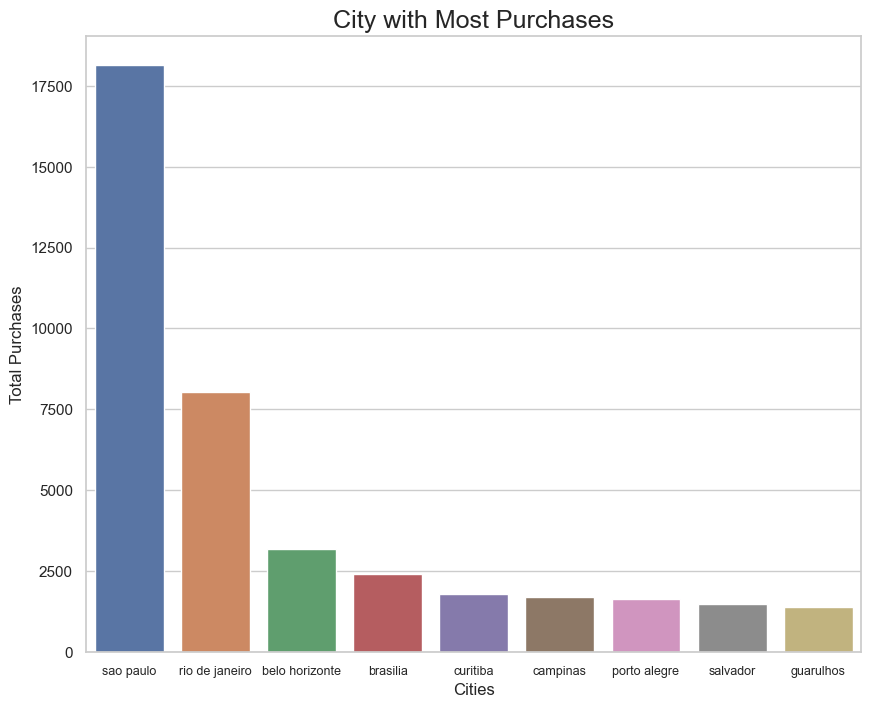

In [162]:
# Custom figures
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting
sns.barplot(data=kota.iloc[0:9], x= 'customer_city', y='jumlah_pembelian')

# show title
plt.title("City with Most Purchases", fontsize=18)

# scale the xticks
plt.xticks(fontsize=9)

# Tampilkan label untuk x-axis
plt.xlabel('Cities', fontsize=12)

# Tampilkan label untuk y-axis
plt.ylabel('Total Purchases')

# Tunjukkan plot yang telah digambar
plt.show()

# 6. Asal Kota yang Memiliki Jumlah Pembelian Terkecil

In [163]:
kota_2 = kota[kota['jumlah_pembelian'] == 1]
kota_2


,customer_city,jumlah_pembelian
3935,umburanas,1
3936,umburatiba,1
3469,sao joao da urtiga,1
3820,terenos,1
3824,terezinha,1
...,...,...
2165,malhador,1
2162,major porto,1
2158,maiquinique,1
2154,magalhaes de almeida,1


In [164]:
print(len(kota_2)/len(kota)*100,"%")

25.329750854909623 %


# 7. Tipe Pembayaran yang Sering Digunakan

In [165]:
payment = olist_completed_1.groupby('payment_type')['order_id'].count().reset_index()
payment.columns = ['payment_type', 'jumlah_pembelian']
payment = payment.sort_values(by='jumlah_pembelian', ascending=False)
payment

,payment_type,jumlah_pembelian
1,credit_card,85092
0,boleto,22450
3,voucher,6128
2,debit_card,1652


Text(0.5, 1.0, 'Most Used Payment Type')

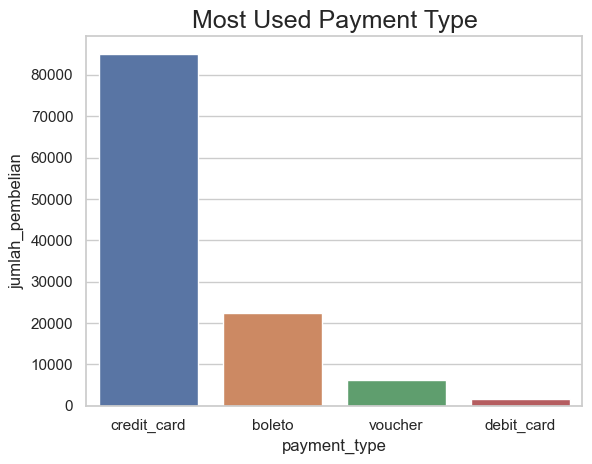

In [166]:
# Plotting
sns.barplot(data=payment, x= 'payment_type', y='jumlah_pembelian')

# show title
plt.title("Most Used Payment Type", fontsize=18)

# 8. Review Score

In [167]:
# filter data berdasarkan persentase response
n_review_score = olist_order_reviews_dataset_1.groupby("review_score").count()[["order_id"]].reset_index()

In [168]:
n_review_score.rename(columns={'order_id':'total_review_score'}, inplace=True)

In [169]:
n_review_score.head()

,review_score,total_review_score
0,1,11424
1,2,3151
2,3,8179
3,4,19142
4,5,57328


In [187]:
n_review_score.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
review_score,5.0,3.0,1.581139,1.0,2.0,3.0,4.0,5.0
total_review_score,5.0,19844.8,21743.780322,3151.0,8179.0,11424.0,19142.0,57328.0


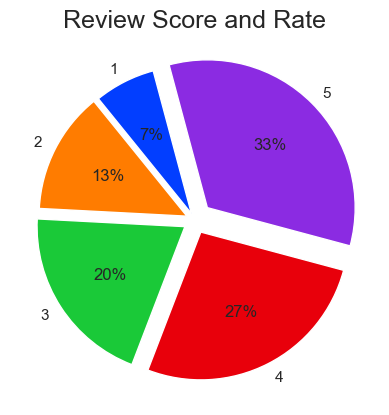

In [170]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

explode = (0.05, 0.06, 0.08, 0.09, 0.12)
  
# plotting data on chart
plt.pie(x=n_review_score['review_score'], labels=n_review_score['review_score'], explode=explode, startangle=105, colors=palette_color, autopct='%1.0f%%')
  
# show title
plt.title("Review Score and Rate", fontsize=18)

# displaying chart
plt.show()

In [ ]:
# Filter data with each review_score 
review_1 = olist_order_reviews_dataset_1[olist_order_reviews_dataset_1['review_score'] == 1]
review_2 = olist_order_reviews_dataset_1[olist_order_reviews_dataset_1['review_score'] == 2]
review_3 = olist_order_reviews_dataset_1[olist_order_reviews_dataset_1['review_score'] == 3]
review_4 = olist_order_reviews_dataset_1[olist_order_reviews_dataset_1['review_score'] == 4]
review_5 = olist_order_reviews_dataset_1[olist_order_reviews_dataset_1['review_score'] == 5]

# Print the review comment message
print('Pesan review:')
for index, row in review_1.iterrows():
    print(row['review_comment_message'])


# Misc


In [172]:
print(len(review_1))
print(review_1.review_comment_message.isna().sum())

11424
2679


In [173]:
print(len(review_2))
print(review_2.review_comment_message.isna().sum())

3151
1006


In [174]:
print(len(review_3))
print(review_3.review_comment_message.isna().sum())

8179
4622


In [175]:
print(len(review_4))
print(review_4.review_comment_message.isna().sum())

19142
13166


In [176]:
print(len(review_5))
print(review_5.review_comment_message.isna().sum())

57328
36774


In [177]:
# Filter data berdasarkan kategori produk
produk_top = ['health_beauty', 'watches_gifts', 'bed_bath_table', 'sports_leisure', 'computers_accessories']
produk_bottom = ['security_and_services', 'fashion_childrens_clothes', 'cds_dvds_musicals']

df_top = olist_completed_1[olist_completed_1['product_category'].isin(produk_top)]
df_bottom = olist_completed_1[olist_completed_1['product_category'].isin(produk_bottom)]

# Menghitung total penjualan per bulan
df_top['month_year'] = pd.to_datetime(df_top['order_purchase_timestamp']).dt.to_period('M')
df_bottom['month_year'] = pd.to_datetime(df_bottom['order_purchase_timestamp']).dt.to_period('M')

# Mengubah jadi str lalu date time lagi
df_top['month_year'] = df_top['month_year'].astype(str)
df_top['month_year'] = pd.to_datetime(df_top['month_year'])

# Untuk bottom_sales
df_bottom['month_year'] = df_bottom['month_year'].astype(str)
df_bottom['month_year'] = pd.to_datetime(df_bottom['month_year'])

top_sales = df_top.groupby(['month_year', 'product_category'])['price'].sum().reset_index()
bottom_sales = df_bottom.groupby(['month_year', 'product_category'])['price'].sum().reset_index()


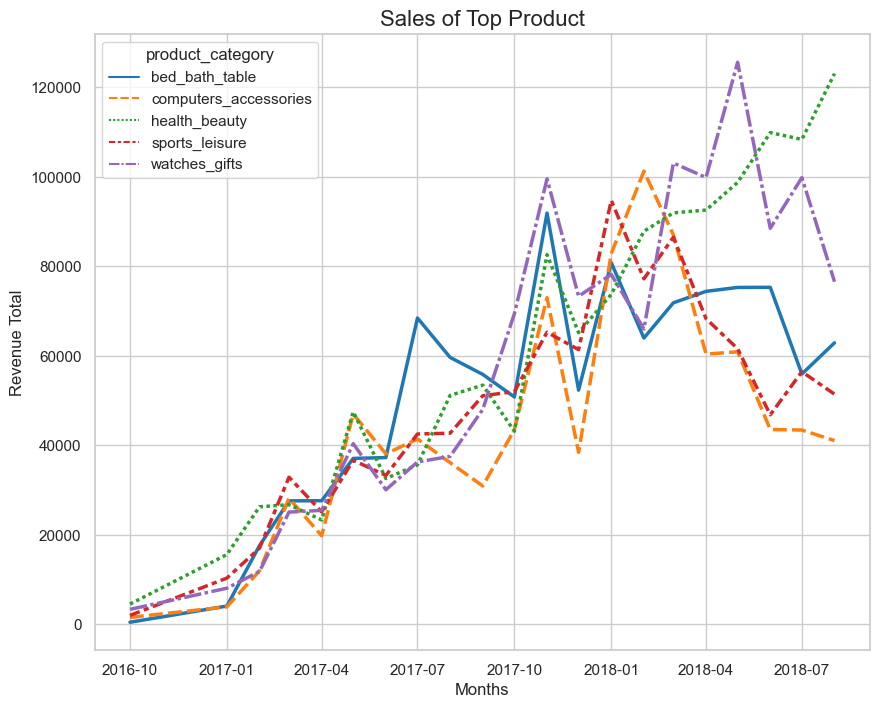

In [178]:
# Custom figures
fig, ax = plt.subplots(figsize=(10, 8))

# Set theme
sns.set_theme(style="whitegrid")

# Plot grafik per bulan
sns.lineplot(data=top_sales, x='month_year', y='price', hue='product_category', style="product_category", markers=False, palette="tab10", linewidth=2.5)

# show title
plt.title("Sales of Top Product", fontsize=16)

# scale the xticks
#plt.xticks([2006,2007,2008,2009,2010])

# Tampilkan label untuk x-axis
plt.xlabel('Months')

# Tampilkan label untuk y-axis
plt.ylabel('Revenue Total')

# Tunjukkan plot yang telah digambar
plt.show()